In [41]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt

In [42]:
(train_X , train_y) , (test_X , test_y) = mnist.load_data()

In [43]:
train_X.shape

(60000, 28, 28)

In [44]:
train_y.shape

(60000,)

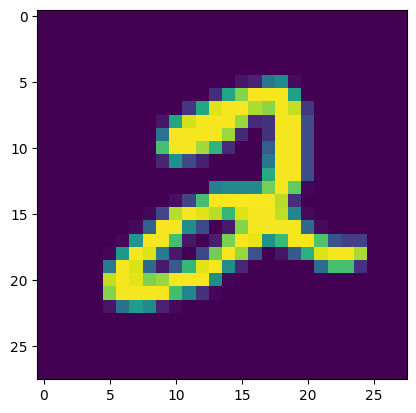

In [45]:
plt.imshow(train_X[5])

In [46]:
train_X = train_X/255
test_X = test_X/255

In [47]:
#model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [48]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [50]:
history = model.fit(train_X, train_y, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2830 - accuracy: 0.9181 - val_loss: 0.1484 - val_accuracy: 0.9592
Epoch 2/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1182 - accuracy: 0.9645 - val_loss: 0.1147 - val_accuracy: 0.9657
Epoch 3/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0808 - accuracy: 0.9753 - val_loss: 0.1005 - val_accuracy: 0.9712
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0619 - accuracy: 0.9807 - val_loss: 0.0960 - val_accuracy: 0.9720
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0465 - accuracy: 0.9848 - val_loss: 0.0969 - val_accuracy: 0.9740
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0380 - accuracy: 0.9880 - val_loss: 0.0983 - val_accuracy: 0.9732
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.1060 - val_accuracy:

In [51]:
y_prob = model.predict(test_X)

313/313 [==============================] - 1s 2ms/step


In [55]:
y_pred = y_prob.argmax(axis=1)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,y_pred)

0.9796

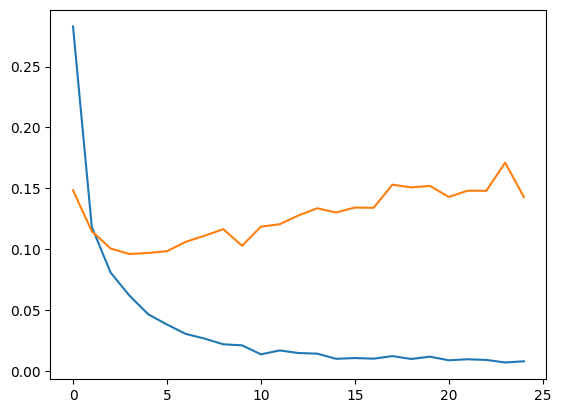

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

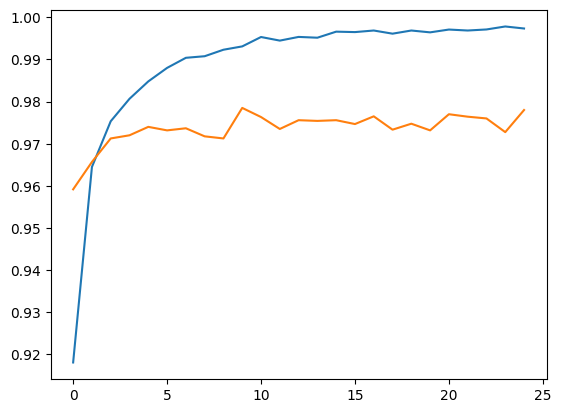

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

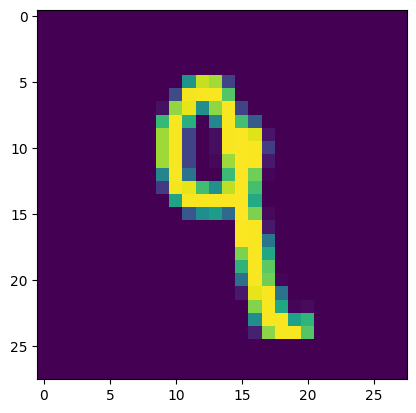

In [59]:
plt.imshow(test_X[264])

In [64]:
model.predict(test_X[264].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 19ms/step


array([9])